# Body Performance Classification
Streamlined workflow covering exploration, modeling, and evaluation.

In [1]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

In [2]:
data_path = Path("bodyPerformance.csv")
df = pd.read_csv(data_path)

print(f"Loaded {data_path.name} with shape {df.shape}")
display(df.head())

Loaded bodyPerformance.csv with shape (2848, 12)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130,54.9,18.4,60,217,C
1,25,M,165.0,55.80,15.7,77.0,126,36.4,16.3,53,229,A
2,31,M,179.6,78.00,20.1,92.0,152,44.8,12.0,49,181,C
3,32,M,174.5,71.10,18.4,76.0,147,41.4,15.2,53,219,B
4,28,M,173.8,67.70,17.1,70.0,127,43.5,27.1,45,217,B


In [3]:
print("Dataset info")
df.info()

print("\nSummary statistics")
display(df.describe(include="all").transpose())

print("\nMissing values per column")
display(df.isnull().sum())

print("\nClass distribution")
display(df["class"].value_counts())

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      2848 non-null   int64  
 1   gender                   2848 non-null   object 
 2   height_cm                2848 non-null   float64
 3   weight_kg                2848 non-null   float64
 4   body fat_%               2848 non-null   float64
 5   diastolic                2848 non-null   float64
 6   systolic                 2848 non-null   int64  
 7   gripForce                2848 non-null   float64
 8   sit and bend forward_cm  2848 non-null   float64
 9   sit-ups counts           2848 non-null   int64  
 10  broad jump_cm            2848 non-null   int64  
 11  class                    2848 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 267.1+ KB

Summary statistics


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2848.0,NaN,NaN,NaN,36.426264,13.437316,21.0,25.0,32.0,47.0,64.0
gender,2848,2,M,1781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_cm,2848.0,NaN,NaN,NaN,168.619558,8.37548,139.8,162.7,169.3,174.9,191.6
weight_kg,2848.0,NaN,NaN,NaN,67.678515,12.081937,36.5,58.4,67.7,75.5,125.7
body fat_%,2848.0,NaN,NaN,NaN,23.494545,7.296716,3.0,18.4,23.0,28.325,78.4
diastolic,2848.0,NaN,NaN,NaN,78.642451,10.6128,8.0,71.0,79.0,86.0,120.0
systolic,2848.0,NaN,NaN,NaN,130.358497,14.575855,77.0,120.0,130.0,141.0,195.0
gripForce,2848.0,NaN,NaN,NaN,36.880825,10.657945,1.6,27.5,37.8,45.1,70.5
sit and bend forward_cm,2848.0,NaN,NaN,NaN,15.338648,8.97278,-25.0,10.675,16.3,21.0,213.0
sit-ups counts,2848.0,NaN,NaN,NaN,39.573385,14.188463,0.0,30.0,41.0,50.0,78.0



Missing values per column


age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


Class distribution


class
C    776
A    697
D    697
B    678
Name: count, dtype: int64

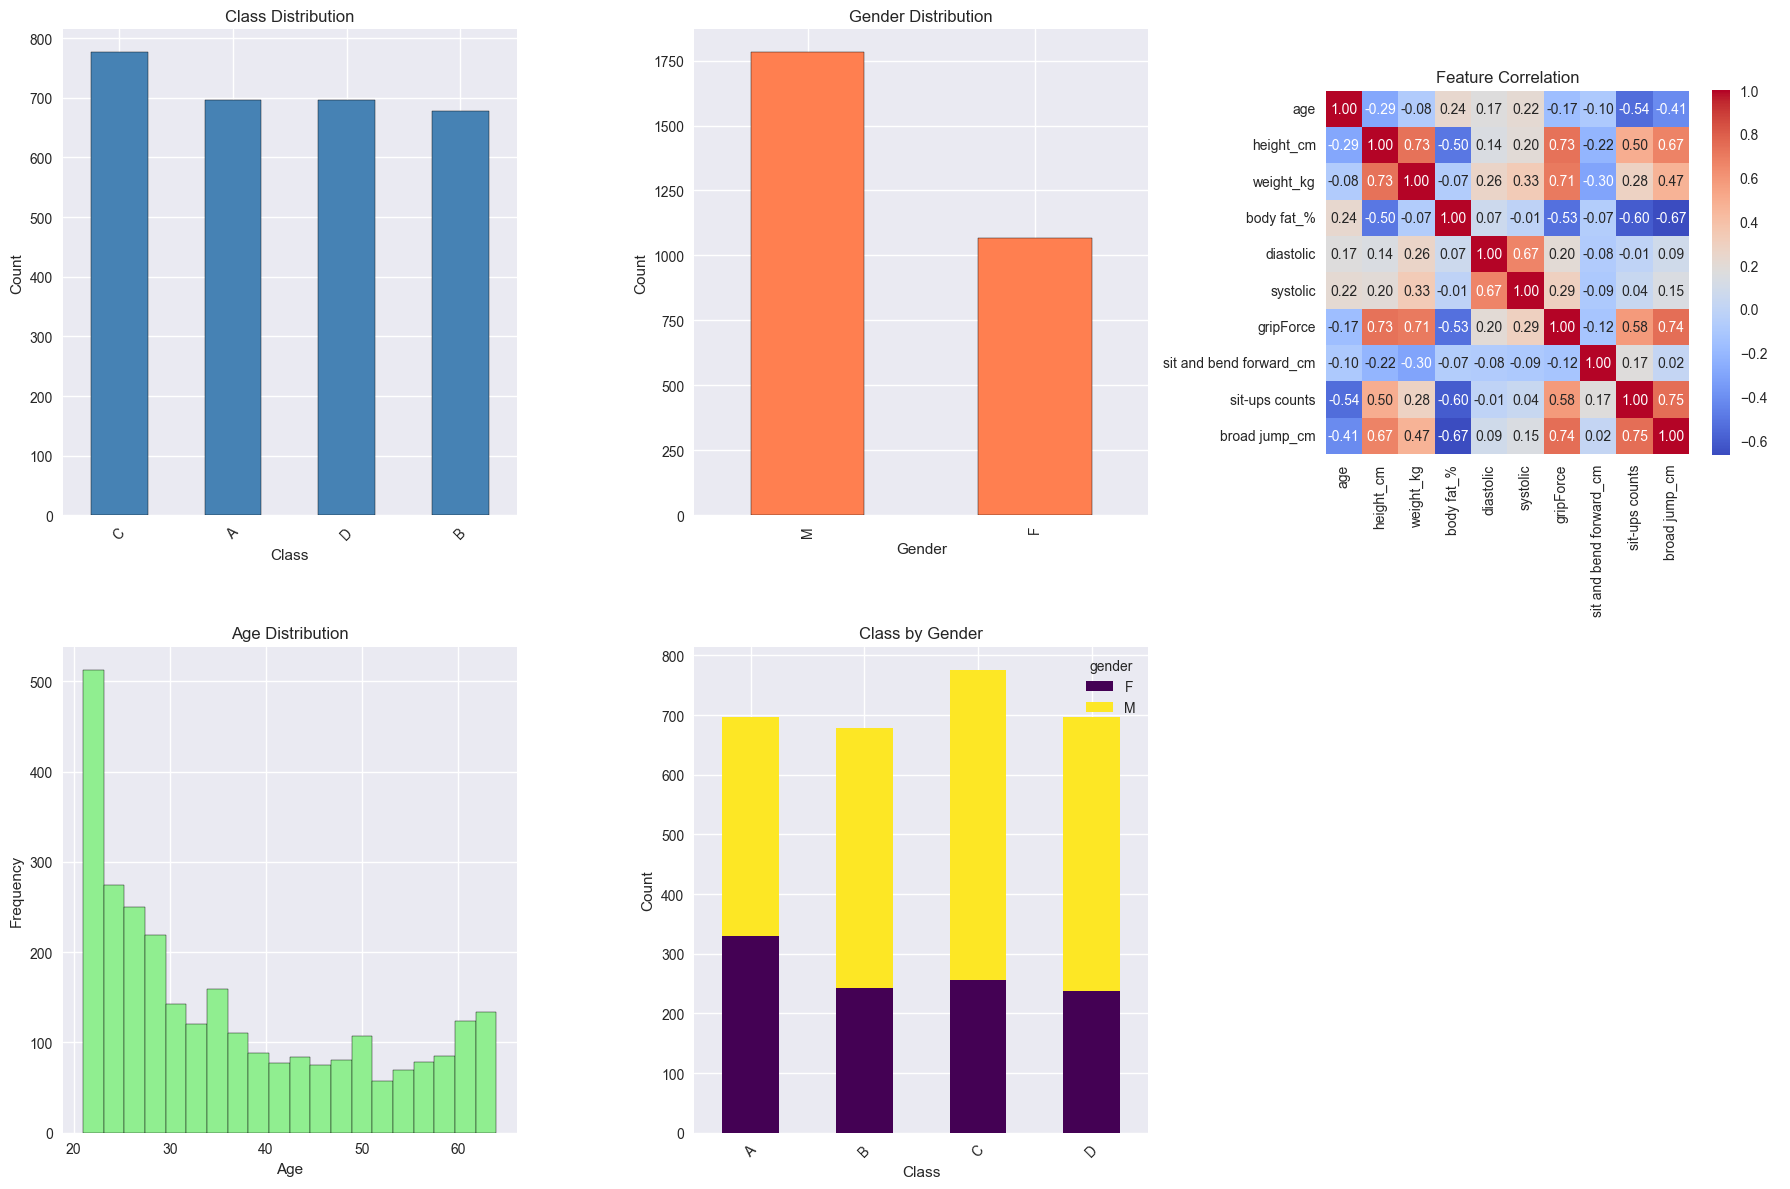

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

class_counts = df["class"].value_counts()
class_counts.plot(kind="bar", ax=axes[0], color="steelblue", edgecolor="black")
axes[0].set_title("Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

if "gender" in df.columns:
    df["gender"].value_counts().plot(kind="bar", ax=axes[1], color="coral", edgecolor="black")
    axes[1].set_title("Gender Distribution")
    axes[1].set_xlabel("Gender")
    axes[1].set_ylabel("Count")
else:
    axes[1].axis("off")

numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm",
                square=True, cbar_kws={"shrink": 0.75}, ax=axes[2])
    axes[2].set_title("Feature Correlation")
else:
    axes[2].axis("off")

if "age" in df.columns:
    axes[3].hist(df["age"], bins=20, color="lightgreen", edgecolor="black")
    axes[3].set_title("Age Distribution")
    axes[3].set_xlabel("Age")
    axes[3].set_ylabel("Frequency")
else:
    axes[3].axis("off")

if "gender" in df.columns:
    pd.crosstab(df["class"], df["gender"]).plot(kind="bar", stacked=True,
                                                  ax=axes[4], colormap="viridis")
    axes[4].set_title("Class by Gender")
    axes[4].set_xlabel("Class")
    axes[4].set_ylabel("Count")
    axes[4].tick_params(axis="x", rotation=45)
else:
    axes[4].axis("off")

axes[5].axis("off")

plt.tight_layout()
plt.show()

In [5]:
df_clean = df.copy()
df_clean = df_clean.dropna(subset=["class"])

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

if "gender" in df_clean.columns:
    le_gender = LabelEncoder()
    df_clean["gender"] = le_gender.fit_transform(df_clean["gender"])
else:
    le_gender = None

le_class = LabelEncoder()
df_clean["class_encoded"] = le_class.fit_transform(df_clean["class"])

before = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed = before - len(df_clean)

print(f"Clean dataset shape: {df_clean.shape} (removed {removed} duplicates)")
df_clean.head()

Clean dataset shape: (2848, 13) (removed 0 duplicates)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_encoded
0,27,1,172.3,75.24,21.3,80.0,130,54.9,18.4,60,217,C,2
1,25,1,165.0,55.80,15.7,77.0,126,36.4,16.3,53,229,A,0
2,31,1,179.6,78.00,20.1,92.0,152,44.8,12.0,49,181,C,2
3,32,1,174.5,71.10,18.4,76.0,147,41.4,15.2,53,219,B,1
4,28,1,173.8,67.70,17.1,70.0,127,43.5,27.1,45,217,B,1


In [6]:
X = df_clean.drop(["class", "class_encoded"], axis=1)
y = df_clean["class_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
 )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    predictions[name] = y_pred
    print(f"{name}: {acc:.3f}")

results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False).reset_index(drop=True)

print("\nTrain/Test split")
print(f"Train: {X_train.shape[0]} samples ({X_train.shape[0] / len(X):.0%})")
print(f"Test: {X_test.shape[0]} samples ({X_test.shape[0] / len(X):.0%})")
print(f"Features: {X_train.shape[1]}")

results_df

Random Forest: 0.675
SVM: 0.682
KNN: 0.561
Decision Tree: 0.584
Logistic Regression: 0.653

Train/Test split
Train: 2278 samples (80%)
Test: 570 samples (20%)
Features: 11
SVM: 0.682
KNN: 0.561
Decision Tree: 0.584
Logistic Regression: 0.653

Train/Test split
Train: 2278 samples (80%)
Test: 570 samples (20%)
Features: 11


,Model,Accuracy
0,SVM,0.682456
1,Random Forest,0.675439
2,Logistic Regression,0.652632
3,Decision Tree,0.584211
4,KNN,0.561404


Best model: SVM (68.25%)

Classification report
              precision    recall  f1-score   support

           A       0.71      0.85      0.78       140
           B       0.56      0.49      0.53       136
           C       0.61      0.67      0.64       155
           D       0.87      0.71      0.78       139

    accuracy                           0.68       570
   macro avg       0.69      0.68      0.68       570
weighted avg       0.69      0.68      0.68       570



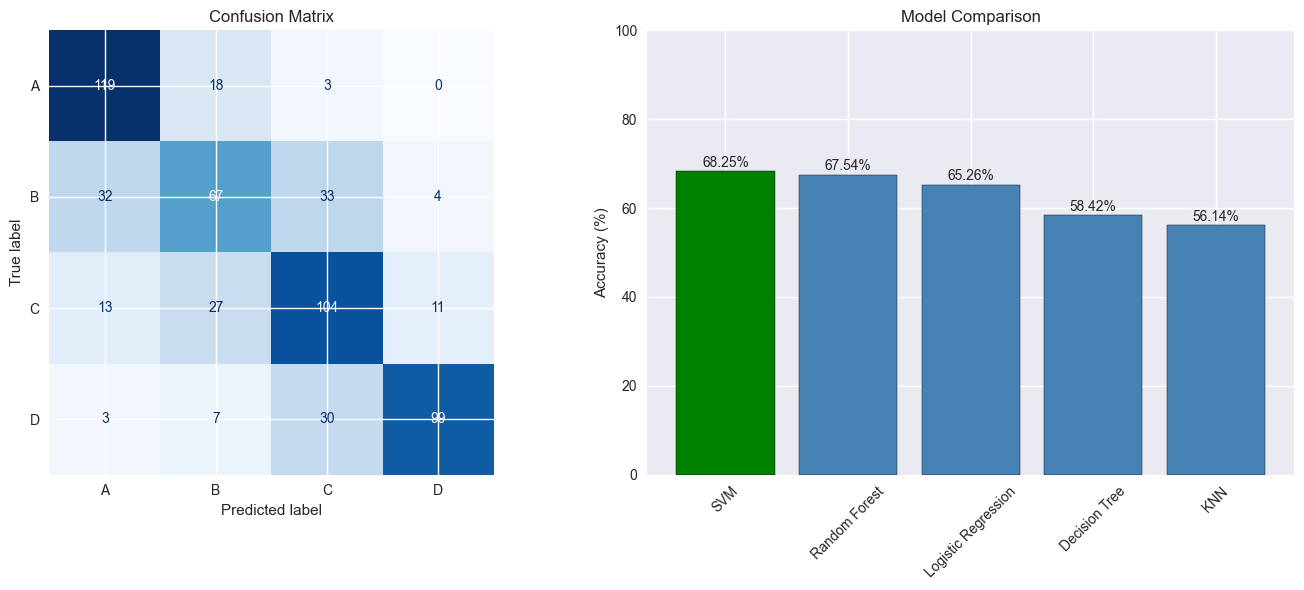

Model ranking:
  SVM: 68.25%
  Random Forest: 67.54%
  Logistic Regression: 65.26%
  Decision Tree: 58.42%
  KNN: 56.14%

Top model: SVM (68.25%)
Score: 15/20 - Good

Dataset summary:
  Samples: 2848
  Train: 2278 (80%)
  Test: 570 (20%)
  Features: 11
  Classes: A, B, C, D

Recommendations:
  - Engineer additional features and explore feature selection.
  - Tune hyperparameters with cross-validation.
  - Collect more samples for underrepresented classes.
  - Review class balance and apply resampling if necessary.


In [7]:
best_model_name = results_df.iloc[0]["Model"]
best_accuracy = results_df.iloc[0]["Accuracy"]
best_predictions = predictions[best_model_name]

print(f"Best model: {best_model_name} ({best_accuracy:.2%})\n")
print("Classification report")
print(classification_report(y_test, best_predictions, target_names=le_class.classes_))

cm = confusion_matrix(y_test, best_predictions)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay(cm, display_labels=le_class.classes_).plot(
    ax=axes[0], cmap="Blues", colorbar=False
 )
axes[0].set_title("Confusion Matrix")

colors = ["green" if model == best_model_name else "steelblue" for model in results_df["Model"]]
axes[1].bar(results_df["Model"], results_df["Accuracy"] * 100, color=colors, edgecolor="black")
axes[1].set_ylim(0, 100)
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_title("Model Comparison")
axes[1].tick_params(axis="x", rotation=45)
for idx, acc in enumerate(results_df["Accuracy"] * 100):
    axes[1].text(idx, acc + 1, f"{acc:.2f}%", ha="center")

plt.tight_layout()
plt.show()

def performance_grade(accuracy):
    if accuracy <= 0.50:
        return 5, "Needs Improvement"
    if accuracy <= 0.60:
        return 10, "Fair"
    if accuracy <= 0.70:
        return 15, "Good"
    return 20, "Excellent"

score, grade = performance_grade(best_accuracy)

print("Model ranking:")
for _, row in results_df.iterrows():
    print(f"  {row['Model']}: {row['Accuracy']:.2%}")

print(f"\nTop model: {best_model_name} ({best_accuracy:.2%})")
print(f"Score: {score}/20 - {grade}")

total_samples = len(df_clean)
train_share = len(X_train) / total_samples
test_share = len(X_test) / total_samples

print("\nDataset summary:")
print(f"  Samples: {total_samples}")
print(f"  Train: {len(X_train)} ({train_share:.0%})")
print(f"  Test: {len(X_test)} ({test_share:.0%})")
print(f"  Features: {X_train.shape[1]}")
print(f"  Classes: {', '.join(le_class.classes_)}")

if best_accuracy < 0.70:
    recommendations = [
        "Engineer additional features and explore feature selection.",
        "Tune hyperparameters with cross-validation.",
        "Collect more samples for underrepresented classes.",
        "Review class balance and apply resampling if necessary.",
    ]
else:
    recommendations = [
        "Consider ensembling or stacking for incremental gains.",
        "Validate with cross-validation before deployment.",
        "Monitor drift on incoming data.",
        "Document data preprocessing assumptions.",
    ]

print("\nRecommendations:")
for item in recommendations:
    print(f"  - {item}")